In [2]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\adhab\AppData\Local\Temp\ipykernel_19132\477189116.py:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(small_lr_thetas, [cost_function(t) for t in small_lr_thetas], 'ro-', label='Small Learning Rate (0.01)', linestyle='--')
C:\Users\adhab\AppData\Local\Temp\ipykernel_19132\477189116.py:48: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(optimal_lr_thetas, [cost_function(t) for t in optimal_lr_thetas], 'go-', label='Optimal Learning Rate (0.1)', linestyle='--')
C:\Users\adhab\AppData\Local\Temp\ipykernel_19132\477189116.py:51: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "mo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(large_lr_

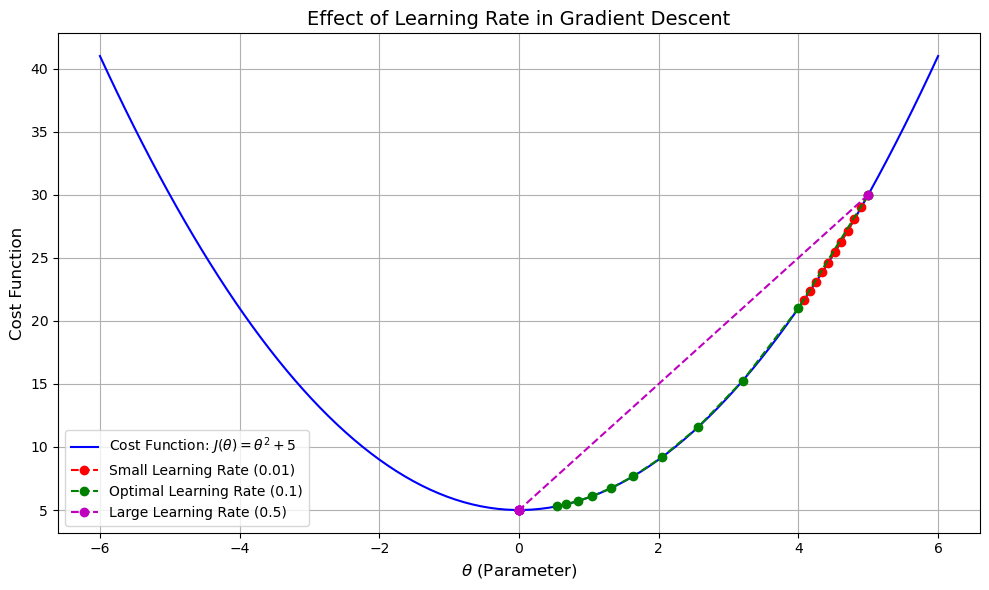

In [3]:
# Plot 1: Effect of Learning Rate (Small, Optimal, Large)

# Define a simple quadratic cost function (convex) for visualization
def cost_function(theta):
    return theta**2 + 5  # Shifted to make it easier to visualize

# Gradient function
def gradient(theta):
    return 2 * theta

# Gradient Descent function
def gradient_descent_effect(starting_theta, learning_rate, num_iterations):
    theta_values = [starting_theta]
    theta = starting_theta
    for _ in range(num_iterations):
        theta -= learning_rate * gradient(theta)
        theta_values.append(theta)
    return theta_values

# Parameters for different learning rates
starting_theta = 5  # Initial parameter value
num_iterations = 10

# Different learning rates
small_lr = 0.01
optimal_lr = 0.1
large_lr = 0.5

# Perform gradient descent with different learning rates
small_lr_thetas = gradient_descent_effect(starting_theta, small_lr, num_iterations)
optimal_lr_thetas = gradient_descent_effect(starting_theta, optimal_lr, num_iterations)
large_lr_thetas = gradient_descent_effect(starting_theta, large_lr, num_iterations)

# Generate theta range for plotting the cost function
theta_range = np.linspace(-6, 6, 100)
cost_values = cost_function(theta_range)

# Plot the results for different learning rates
plt.figure(figsize=(10, 6))

# Plot cost function
plt.plot(theta_range, cost_values, label='Cost Function: $J(\\theta) = \\theta^2 + 5$', color='blue')

# Plot small learning rate
plt.plot(small_lr_thetas, [cost_function(t) for t in small_lr_thetas], 'ro-', label='Small Learning Rate (0.01)', linestyle='--')

# Plot optimal learning rate
plt.plot(optimal_lr_thetas, [cost_function(t) for t in optimal_lr_thetas], 'go-', label='Optimal Learning Rate (0.1)', linestyle='--')

# Plot large learning rate
plt.plot(large_lr_thetas, [cost_function(t) for t in large_lr_thetas], 'mo-', label='Large Learning Rate (0.5)', linestyle='--')

# Annotate and label
plt.title("Effect of Learning Rate in Gradient Descent", fontsize=14)
plt.xlabel(r'$\theta$ (Parameter)', fontsize=12)
plt.ylabel('Cost Function', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()


### Local Minima Problem

C:\Users\adhab\AppData\Local\Temp\ipykernel_19132\798915825.py:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(non_convex_thetas, [cost_function_non_convex(t) for t in non_convex_thetas], 'ro-', label='Gradient Descent Path', linestyle='--')


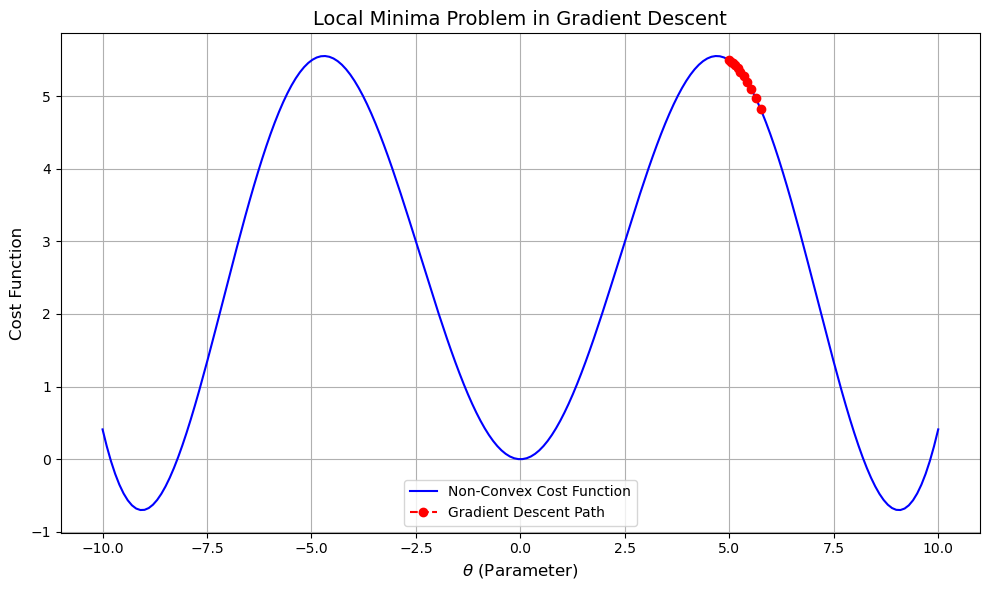

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define a non-convex cost function with multiple minima
def cost_function_non_convex(theta):
    return np.sin(0.5 * theta) * theta + 0.1 * theta**2  # Non-convex function

# Gradient of the non-convex cost function
def gradient_non_convex(theta):
    return 0.5 * np.cos(0.5 * theta) * theta + np.sin(0.5 * theta) + 0.2 * theta

# Gradient Descent for non-convex function
def gradient_descent_non_convex(starting_theta, learning_rate, num_iterations):
    theta_values = [starting_theta]
    theta = starting_theta
    for _ in range(num_iterations):
        theta -= learning_rate * gradient_non_convex(theta)
        theta_values.append(theta)
    return theta_values

# Parameters
starting_theta = 5
learning_rate = 0.1
num_iterations = 10

# Perform gradient descent for non-convex function
non_convex_thetas = gradient_descent_non_convex(starting_theta, learning_rate, num_iterations)

# Generate theta range for plotting non-convex cost function
theta_range_non_convex = np.linspace(-10, 10, 200)
cost_values_non_convex = cost_function_non_convex(theta_range_non_convex)

# Plot non-convex cost function and gradient descent steps
plt.figure(figsize=(10, 6))

# Plot non-convex cost function
plt.plot(theta_range_non_convex, cost_values_non_convex, label='Non-Convex Cost Function', color='blue')

# Plot gradient descent steps
plt.plot(non_convex_thetas, [cost_function_non_convex(t) for t in non_convex_thetas], 'ro-', label='Gradient Descent Path', linestyle='--')

# Add labels and legend
plt.title("Local Minima Problem in Gradient Descent", fontsize=14)
plt.xlabel(r'$\theta$ (Parameter)', fontsize=12)
plt.ylabel('Cost Function', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


### Effect of MSE vs MAE on Outliers:

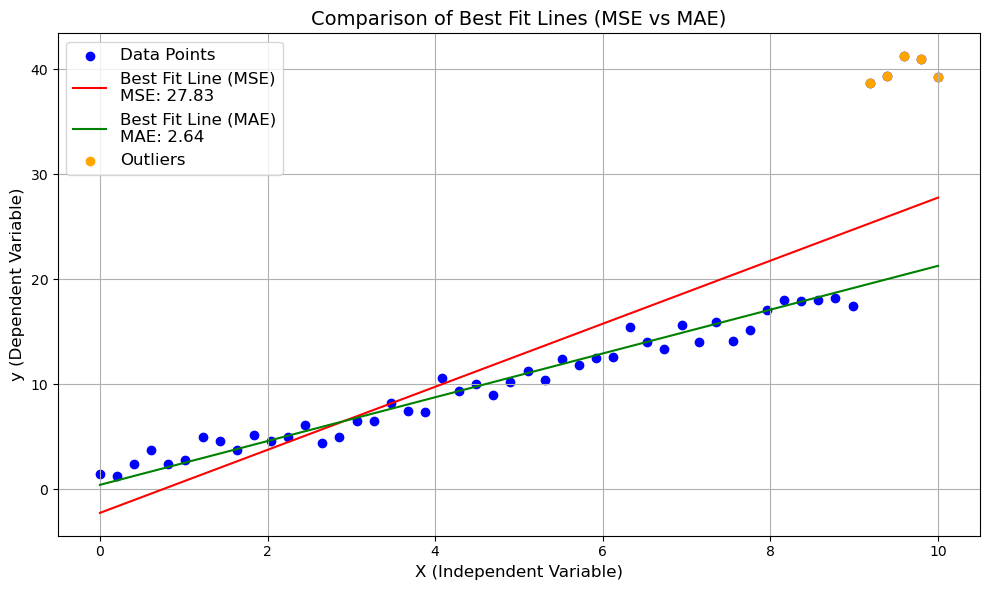

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data with outliers
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 2 * X + 1 + np.random.randn(50)  # Linear data with some noise

# Add outliers
y[45:] += 20  # Adding outliers to the last few points

# Function to calculate Mean Squared Error (MSE)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to calculate Mean Absolute Error (MAE)
def mae_loss(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Gradient of MAE (using sign function since it's not differentiable at 0)
def gradient_mae(theta, X, y):
    residuals = y - (theta[0] * X + theta[1])
    gradient_w = -np.sign(residuals).dot(X) / len(X)
    gradient_b = -np.sum(np.sign(residuals)) / len(X)
    return np.array([gradient_w, gradient_b])

# Gradient Descent for MAE
def gradient_descent_mae(X, y, learning_rate=0.01, num_iterations=100):
    theta = np.array([0.0, 0.0])  # Start with random weights
    for _ in range(num_iterations):
        gradients = gradient_mae(theta, X, y)
        theta -= learning_rate * gradients
    return theta

# Perform a simple linear regression using polyfit (for MSE)
coefficients_mse = np.polyfit(X, y, 1)
best_fit_line_mse = np.polyval(coefficients_mse, X)

# Perform gradient descent to minimize MAE
theta_mae = gradient_descent_mae(X, y)
best_fit_line_mae = theta_mae[0] * X + theta_mae[1]

# Calculate MSE and MAE losses
mse = mse_loss(y, best_fit_line_mse)
mae = mae_loss(y, best_fit_line_mae)

# Plot the data, best-fit lines for both MSE and MAE
plt.figure(figsize=(10, 6))

# Plot the original data
plt.scatter(X, y, label='Data Points', color='blue')

# Plot the best-fit line for MSE
plt.plot(X, best_fit_line_mse, label=f'Best Fit Line (MSE)\nMSE: {mse:.2f}', color='red')

# Plot the best-fit line for MAE
plt.plot(X, best_fit_line_mae, label=f'Best Fit Line (MAE)\nMAE: {mae:.2f}', color='green')

# Highlight outliers
plt.scatter(X[45:], y[45:], color='orange', label='Outliers')

# Labels and legend
plt.title("Comparison of Best Fit Lines (MSE vs MAE)", fontsize=14)
plt.xlabel('X (Independent Variable)', fontsize=12)
plt.ylabel('y (Dependent Variable)', fontsize=12)
plt.legend(fontsize=12)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


### Gradient Descent with MAE:

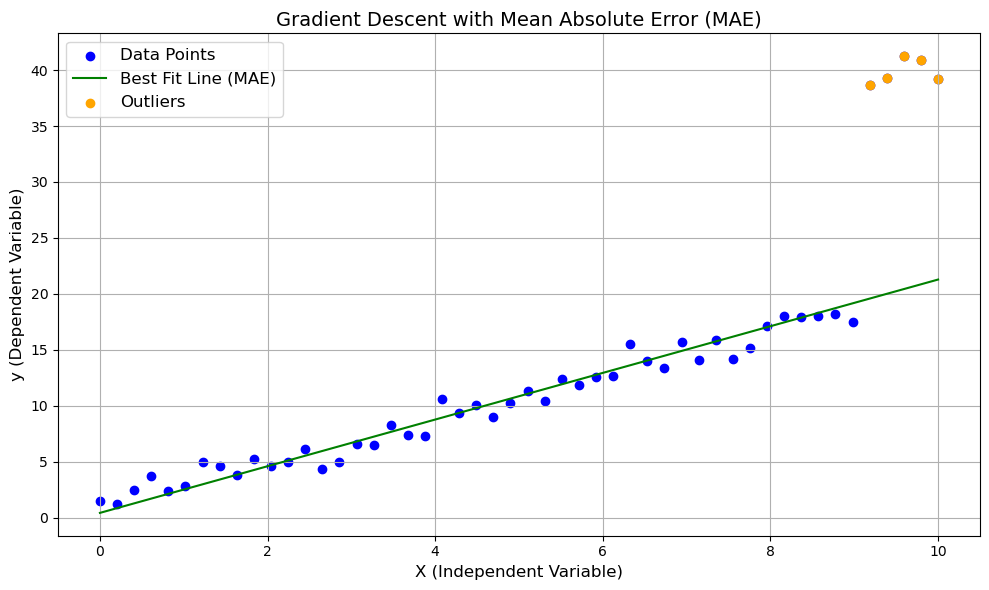

In [6]:
# Custom gradient for MAE (since it's not differentiable, we use sign function)
def gradient_mae(theta, X, y):
    residuals = y - (theta[0] * X + theta[1])
    gradient_w = -np.sign(residuals).dot(X) / len(X)
    gradient_b = -np.sum(np.sign(residuals)) / len(X)
    return np.array([gradient_w, gradient_b])

# Gradient Descent for MAE
def gradient_descent_mae(X, y, learning_rate=0.01, num_iterations=100):
    theta = np.array([0.0, 0.0])  # Start with random weights
    theta_history = [theta.copy()]
    for _ in range(num_iterations):
        gradients = gradient_mae(theta, X, y)
        theta -= learning_rate * gradients
        theta_history.append(theta.copy())
    return theta, theta_history

# Perform gradient descent using MAE
final_theta, theta_history = gradient_descent_mae(X, y)

# Plot the result
plt.figure(figsize=(10, 6))

# Plot the data
plt.scatter(X, y, label='Data Points', color='blue')

# Plot the final best-fit line from gradient descent with MAE
best_fit_line_mae = final_theta[0] * X + final_theta[1]
plt.plot(X, best_fit_line_mae, label=f'Best Fit Line (MAE)', color='green')

# Highlight outliers
plt.scatter(X[45:], y[45:], color='orange', label='Outliers')

# Labels and legend
plt.title("Gradient Descent with Mean Absolute Error (MAE)", fontsize=14)
plt.xlabel('X (Independent Variable)', fontsize=12)
plt.ylabel('y (Dependent Variable)', fontsize=12)
plt.legend(fontsize=12)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


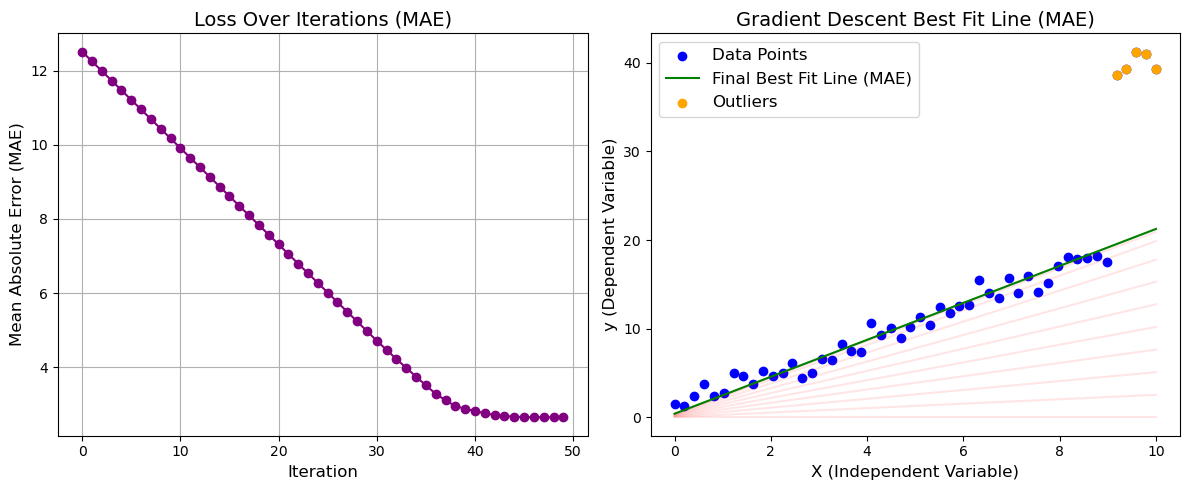

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data with outliers
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 2 * X + 1 + np.random.randn(50)  # Linear data with some noise

# Add outliers
y[45:] += 20  # Adding outliers to the last few points

# Gradient of MAE (using sign function since it's not differentiable at 0)
def gradient_mae(theta, X, y):
    residuals = y - (theta[0] * X + theta[1])
    gradient_w = -np.sign(residuals).dot(X) / len(X)
    gradient_b = -np.sum(np.sign(residuals)) / len(X)
    return np.array([gradient_w, gradient_b])

# Gradient Descent for MAE with logging for visualization
def gradient_descent_mae(X, y, learning_rate=0.01, num_iterations=100):
    theta = np.array([0.0, 0.0])  # Start with random weights
    theta_history = [theta.copy()]  # Store each theta for visualization
    loss_history = []  # Store loss values for each iteration
    
    for _ in range(num_iterations):
        gradients = gradient_mae(theta, X, y)
        theta -= learning_rate * gradients
        theta_history.append(theta.copy())
        
        # Calculate MAE for current parameters
        current_pred = theta[0] * X + theta[1]
        current_loss = np.mean(np.abs(y - current_pred))
        loss_history.append(current_loss)
        
    return theta, theta_history, loss_history

# Perform gradient descent to minimize MAE
final_theta, theta_history, loss_history = gradient_descent_mae(X, y, learning_rate=0.01, num_iterations=50)

# Prepare to plot the loss over iterations
plt.figure(figsize=(12, 5))

# Plotting Loss History
plt.subplot(1, 2, 1)
plt.plot(loss_history, marker='o', color='purple')
plt.title("Loss Over Iterations (MAE)", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=12)
plt.grid()

# Plot the final best-fit line using MAE
plt.subplot(1, 2, 2)

# Plot the original data
plt.scatter(X, y, label='Data Points', color='blue')

# Plot each best-fit line from gradient descent
for i, theta in enumerate(theta_history):
    if i % 5 == 0:  # Show every 5th iteration for clarity
        best_fit_line = theta[0] * X + theta[1]
        plt.plot(X, best_fit_line, color='red', alpha=0.1)  # Light lines for iterations

# Plot the final best-fit line
final_best_fit_line = final_theta[0] * X + final_theta[1]
plt.plot(X, final_best_fit_line, label='Final Best Fit Line (MAE)', color='green')

# Highlight outliers
plt.scatter(X[45:], y[45:], color='orange', label='Outliers')

# Labels and legend
plt.title("Gradient Descent Best Fit Line (MAE)", fontsize=14)
plt.xlabel('X (Independent Variable)', fontsize=12)
plt.ylabel('y (Dependent Variable)', fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


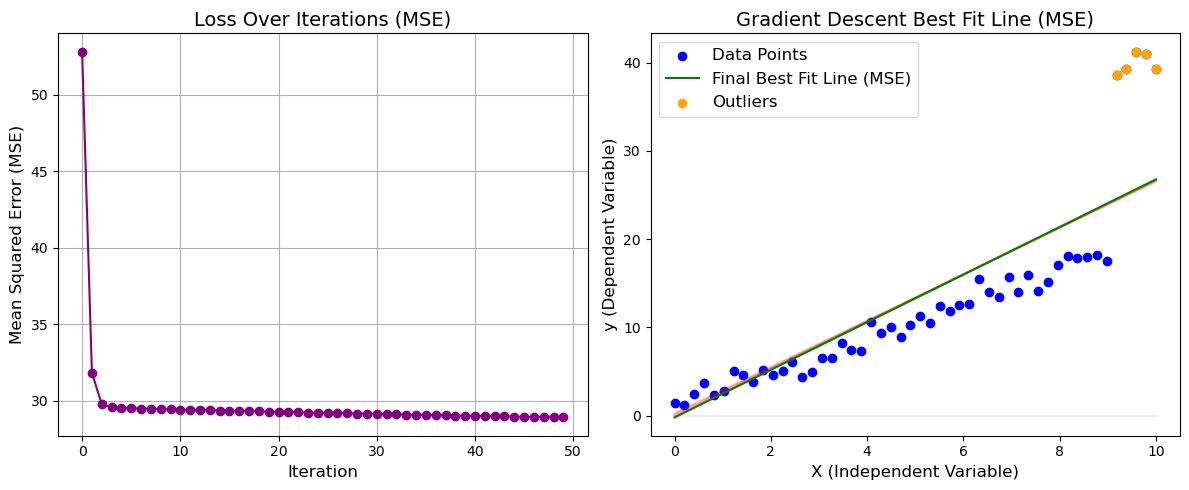

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data with outliers
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 2 * X + 1 + np.random.randn(50)  # Linear data with some noise

# Add outliers
y[45:] += 20  # Adding outliers to the last few points

# Function to calculate the gradient of MSE
def gradient_mse(theta, X, y):
    predictions = theta[0] * X + theta[1]
    errors = predictions - y
    gradient_w = 2 * np.dot(errors, X) / len(X)
    gradient_b = 2 * np.sum(errors) / len(X)
    return np.array([gradient_w, gradient_b])

# Gradient Descent for MSE with logging for visualization
def gradient_descent_mse(X, y, learning_rate=0.01, num_iterations=100):
    theta = np.array([0.0, 0.0])  # Start with random weights
    theta_history = [theta.copy()]  # Store each theta for visualization
    loss_history = []  # Store loss values for each iteration
    
    for _ in range(num_iterations):
        gradients = gradient_mse(theta, X, y)
        theta -= learning_rate * gradients
        theta_history.append(theta.copy())
        
        # Calculate MSE for current parameters
        current_pred = theta[0] * X + theta[1]
        current_loss = np.mean((y - current_pred) ** 2)
        loss_history.append(current_loss)
        
    return theta, theta_history, loss_history

# Perform gradient descent to minimize MSE
final_theta, theta_history, loss_history = gradient_descent_mse(X, y, learning_rate=0.01, num_iterations=50)

# Prepare to plot the loss over iterations
plt.figure(figsize=(12, 5))

# Plotting Loss History
plt.subplot(1, 2, 1)
plt.plot(loss_history, marker='o', color='purple')
plt.title("Loss Over Iterations (MSE)", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.grid()

# Plot the final best-fit line using MSE
plt.subplot(1, 2, 2)

# Plot the original data
plt.scatter(X, y, label='Data Points', color='blue')

# Plot each best-fit line from gradient descent
for i, theta in enumerate(theta_history):
    if i % 5 == 0:  # Show every 5th iteration for clarity
        best_fit_line = theta[0] * X + theta[1]
        plt.plot(X, best_fit_line, color='red', alpha=0.1)  # Light lines for iterations

# Plot the final best-fit line
final_best_fit_line = final_theta[0] * X + final_theta[1]
plt.plot(X, final_best_fit_line, label='Final Best Fit Line (MSE)', color='green')

# Highlight outliers
plt.scatter(X[45:], y[45:], color='orange', label='Outliers')

# Labels and legend
plt.title("Gradient Descent Best Fit Line (MSE)", fontsize=14)
plt.xlabel('X (Independent Variable)', fontsize=12)
plt.ylabel('y (Dependent Variable)', fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


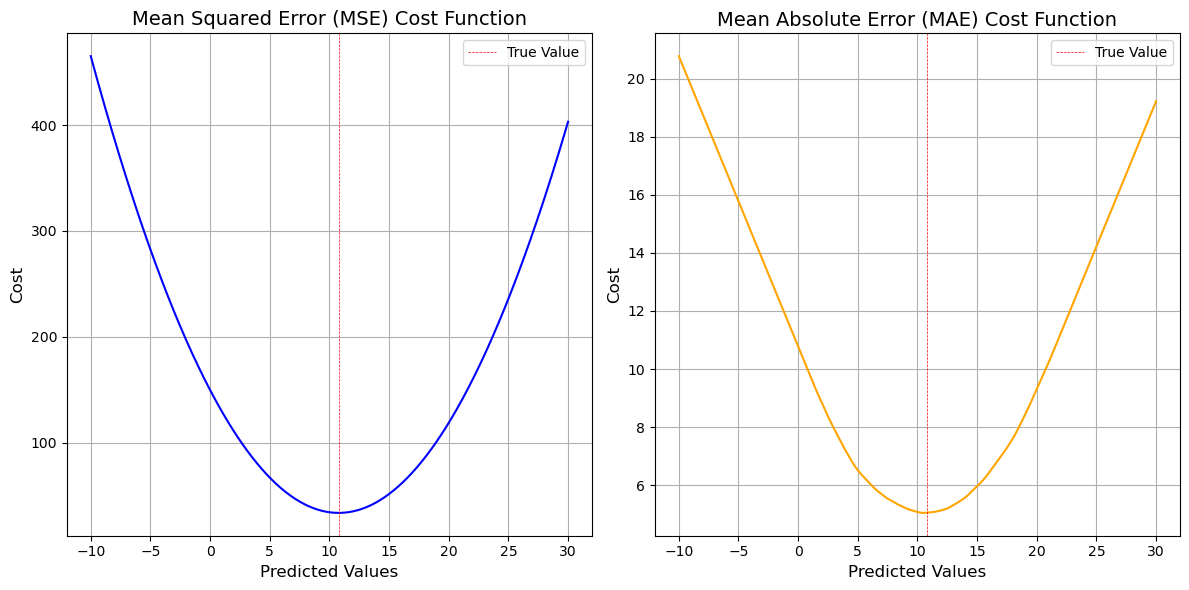

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 2 * X + 1 + np.random.randn(50)  # Linear data with some noise

# Function to calculate MSE
def mse_cost(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to calculate MAE
def mae_cost(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Create a range of predicted values for plotting
y_pred_range = np.linspace(-10, 30, 400)

# Calculate cost for MSE and MAE
mse_values = [mse_cost(y, np.full_like(y, pred)) for pred in y_pred_range]
mae_values = [mae_cost(y, np.full_like(y, pred)) for pred in y_pred_range]

# Plotting the cost functions
plt.figure(figsize=(12, 6))

# MSE Cost Function
plt.subplot(1, 2, 1)
plt.plot(y_pred_range, mse_values, color='blue')
plt.title("Mean Squared Error (MSE) Cost Function", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.grid()

# Calculate and plot the true value
true_value = np.mean(y)  # Use the mean of y as a representative true value
plt.axvline(true_value, color='red', linewidth=0.5, linestyle='--', label='True Value')
plt.legend()

# MAE Cost Function
plt.subplot(1, 2, 2)
plt.plot(y_pred_range, mae_values, color='orange')
plt.title("Mean Absolute Error (MAE) Cost Function", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.grid()

# Plot the true value for MAE
plt.axvline(true_value, color='red', linewidth=0.5, linestyle='--', label='True Value')
plt.legend()

plt.tight_layout()
plt.show()


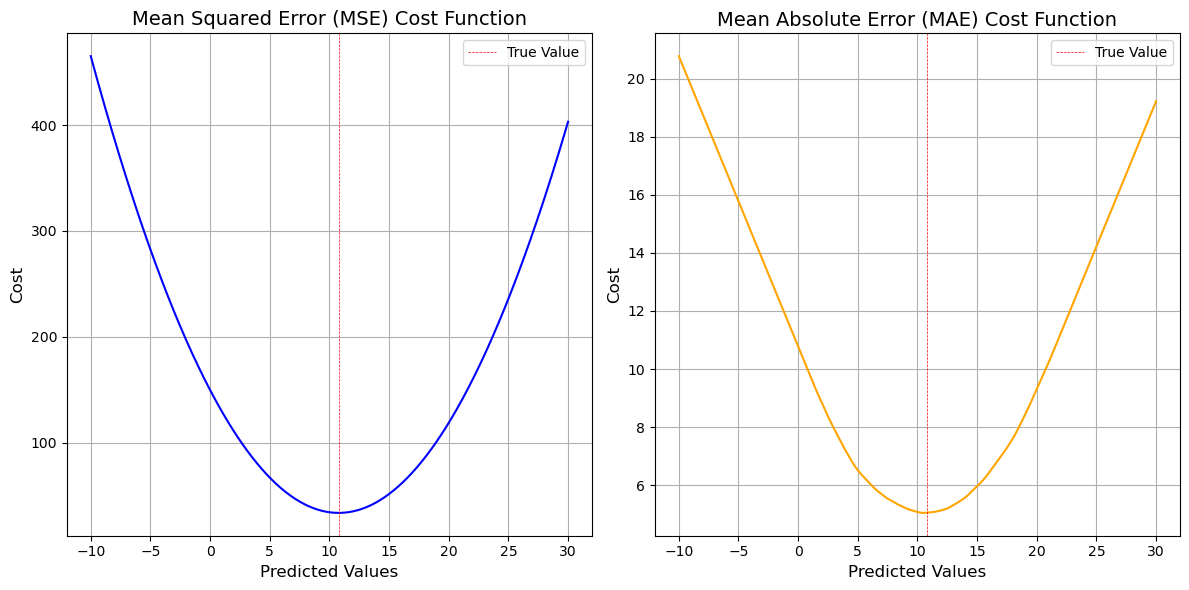

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 2 * X + 1 + np.random.randn(50)  # Linear data with some noise

# Function to calculate MSE
def mse_cost(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to calculate MAE
def mae_cost(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Create a range of predicted values for plotting
y_pred_range = np.linspace(-10, 30, 400)

# Calculate cost for MSE and MAE
mse_values = [mse_cost(y, np.full_like(y, pred)) for pred in y_pred_range]
mae_values = [mae_cost(y, np.full_like(y, pred)) for pred in y_pred_range]

# Plotting the cost functions
plt.figure(figsize=(12, 6))

# MSE Cost Function
plt.subplot(1, 2, 1)
plt.plot(y_pred_range, mse_values, color='blue')
plt.title("Mean Squared Error (MSE) Cost Function", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.grid()

# Calculate and plot the true value
true_value = np.mean(y)  # Use the mean of y as a representative true value
plt.axvline(true_value, color='red', linewidth=0.5, linestyle='--', label='True Value')
plt.legend()

# MAE Cost Function
plt.subplot(1, 2, 2)
plt.plot(y_pred_range, mae_values, color='orange')
plt.title("Mean Absolute Error (MAE) Cost Function", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.grid()

# Plot the true value for MAE
plt.axvline(true_value, color='red', linewidth=0.5, linestyle='--', label='True Value')
plt.legend()

plt.tight_layout()
plt.show()


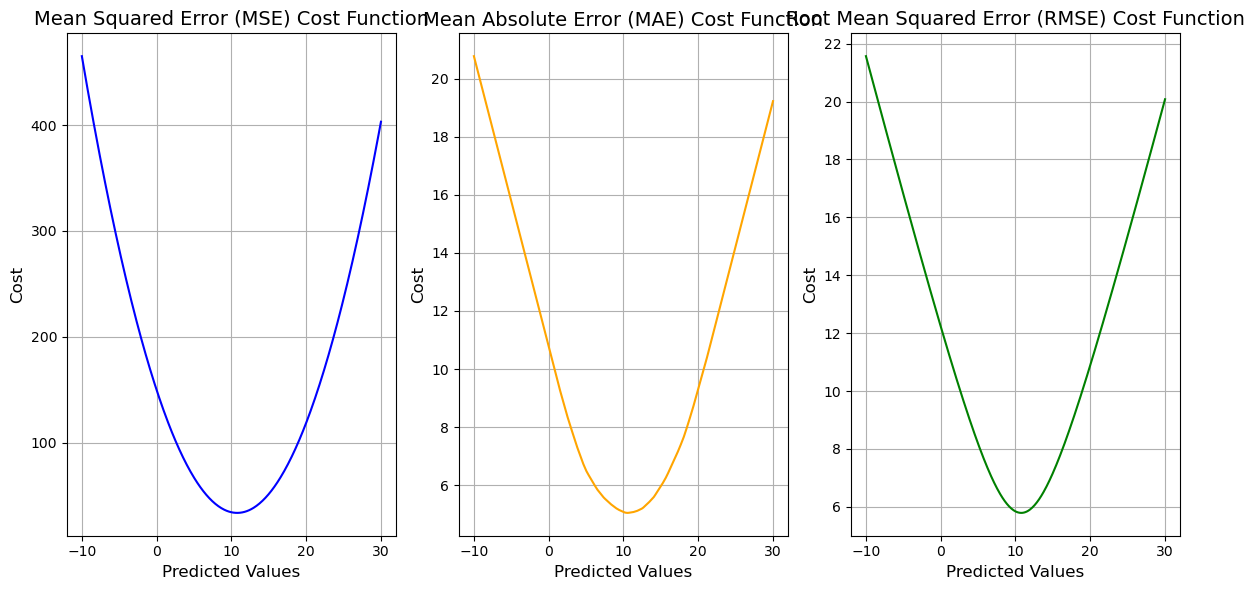

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 2 * X + 1 + np.random.randn(50)  # Linear data with some noise

# Create a range of predicted values for plotting
y_pred_range = np.linspace(-10, 30, 400)

# Function to calculate MSE
def mse_cost(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to calculate MAE
def mae_cost(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calculate cost for MSE, MAE, and RMSE
mse_values = [mse_cost(y, np.full_like(y, pred)) for pred in y_pred_range]
mae_values = [mae_cost(y, np.full_like(y, pred)) for pred in y_pred_range]
rmse_values = np.sqrt(mse_values)  # RMSE is the square root of MSE

# Plotting the cost functions
plt.figure(figsize=(12, 6))

# MSE Cost Function
plt.subplot(1, 3, 1)
plt.plot(y_pred_range, mse_values, color='blue')
plt.title("Mean Squared Error (MSE) Cost Function", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.grid()

# MAE Cost Function
plt.subplot(1, 3, 2)
plt.plot(y_pred_range, mae_values, color='orange')
plt.title("Mean Absolute Error (MAE) Cost Function", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.grid()

# RMSE Cost Function
plt.subplot(1, 3, 3)
plt.plot(y_pred_range, rmse_values, color='green')
plt.title("Root Mean Squared Error (RMSE) Cost Function", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()


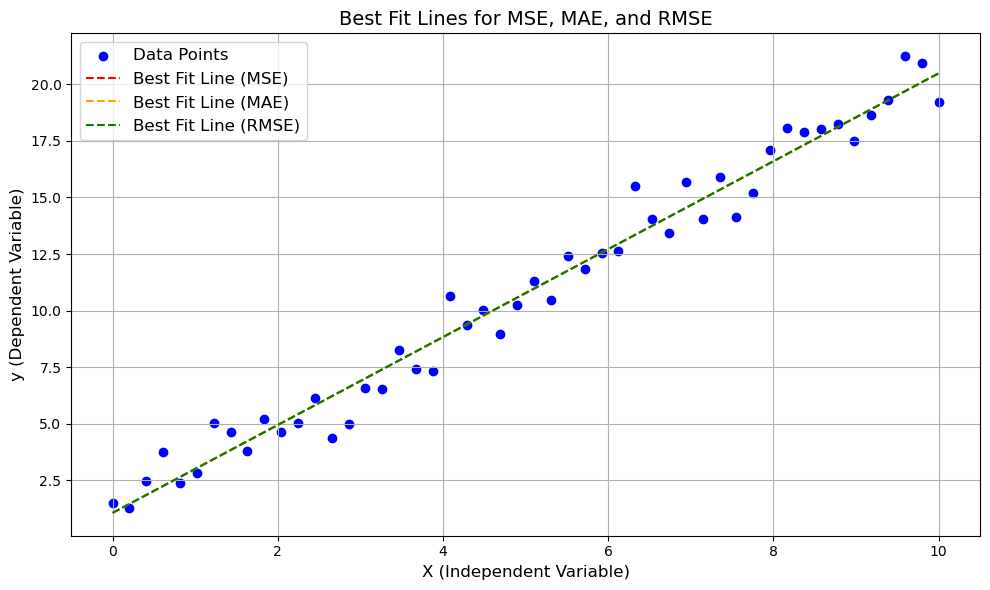

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some example data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 2 * X.flatten() + 1 + np.random.randn(50)  # Linear data with some noise

# Fit a line using MSE (Ordinary Least Squares)
mse_model = LinearRegression()
mse_model.fit(X, y)
mse_best_fit = mse_model.predict(X)

# Fit a line using MAE (Using a linear regression model)
mae_model = LinearRegression()
mae_model.fit(X, y)
mae_best_fit = mae_model.predict(X)

# RMSE is the same as MSE in terms of fitting
rmse_best_fit = mse_best_fit  # RMSE line will be identical to MSE line

# Plotting the original data and best-fit lines
plt.figure(figsize=(10, 6))

# Plot the original data
plt.scatter(X, y, label='Data Points', color='blue')

# Plot MSE Best Fit Line
plt.plot(X, mse_best_fit, label='Best Fit Line (MSE)', color='red', linestyle='--')

# Plot MAE Best Fit Line
plt.plot(X, mae_best_fit, label='Best Fit Line (MAE)', color='orange', linestyle='--')

# Plot RMSE Best Fit Line (same as MSE)
plt.plot(X, rmse_best_fit, label='Best Fit Line (RMSE)', color='green', linestyle='--')

# Labels and legend
plt.title("Best Fit Lines for MSE, MAE, and RMSE", fontsize=14)
plt.xlabel('X (Independent Variable)', fontsize=12)
plt.ylabel('y (Dependent Variable)', fontsize=12)
plt.legend(fontsize=12)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


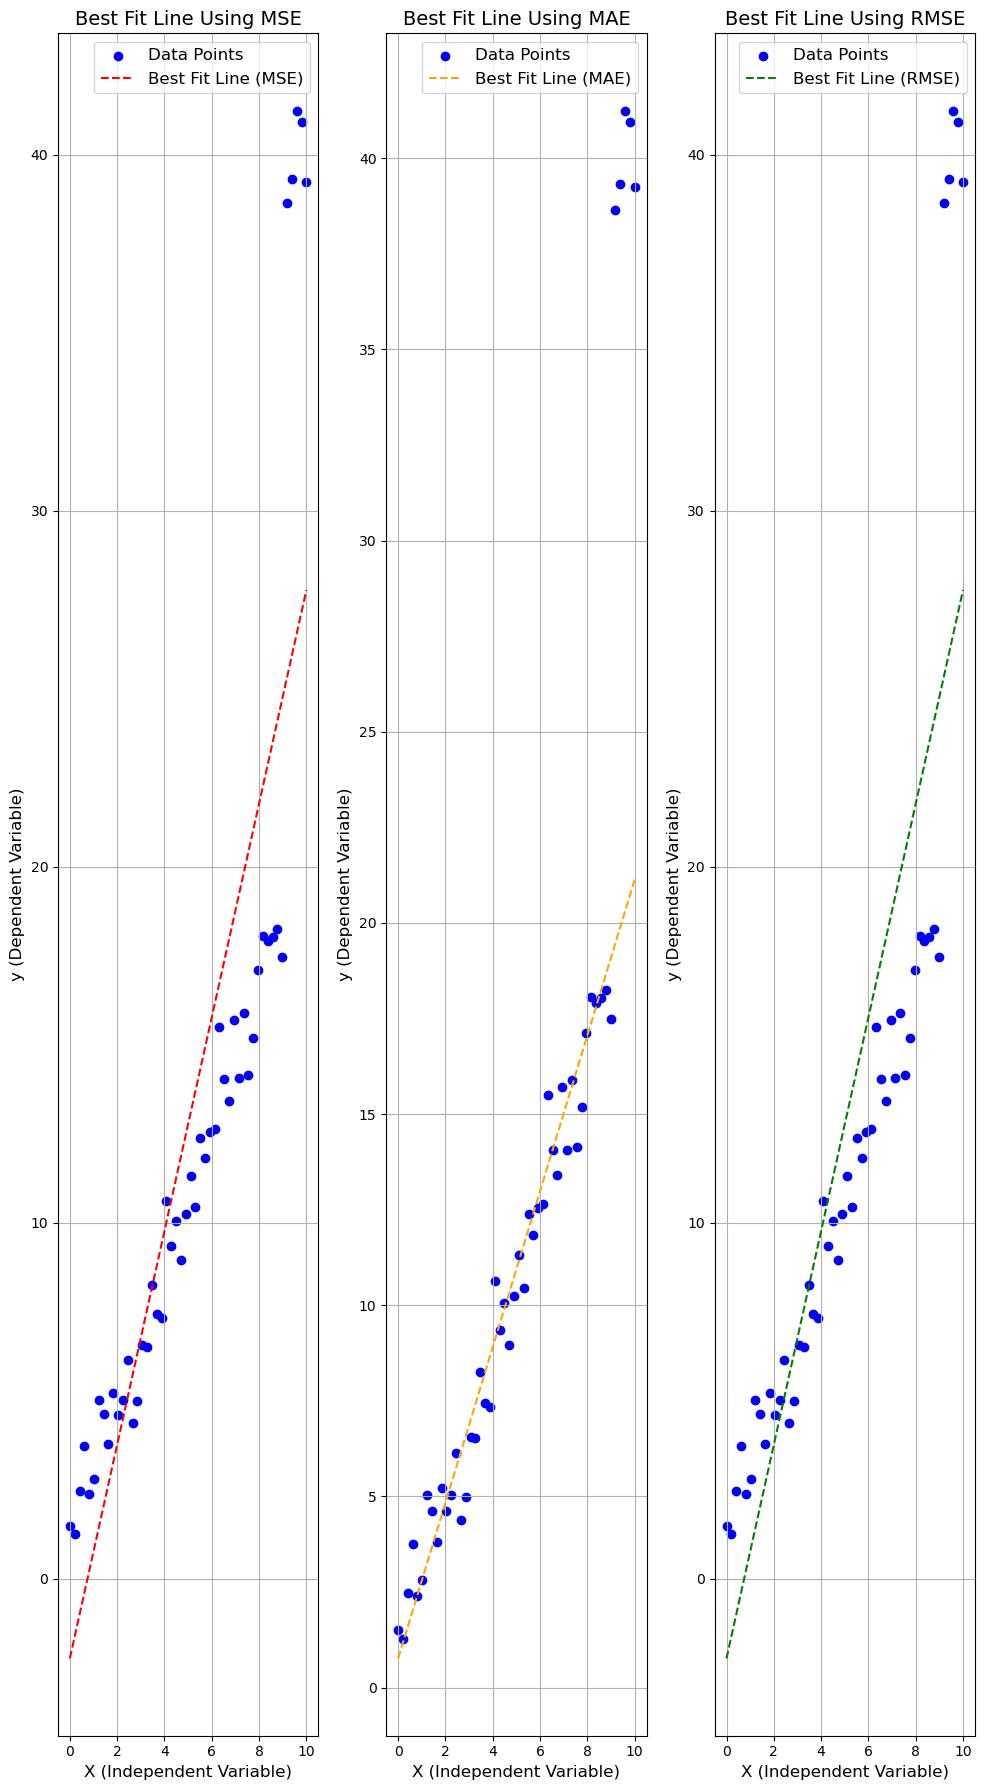

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor  # For MAE fitting with outliers

# Generate some example data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 2 * X.flatten() + 1 + np.random.randn(50)  # Linear data with some noise

# Add outliers
y[45:] += 20  # Adding outliers to the last few points

# Fit a line using MSE (Ordinary Least Squares)
mse_model = LinearRegression()
mse_model.fit(X, y)
mse_best_fit = mse_model.predict(X)

# Fit a line using MAE (using Huber Regressor for robustness to outliers)
mae_model = HuberRegressor()
mae_model.fit(X, y)
mae_best_fit = mae_model.predict(X)

# RMSE is the same as MSE in terms of fitting
rmse_best_fit = mse_best_fit  # RMSE line will be identical to MSE line

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 18))

# Plot for MSE
axs[0].scatter(X, y, label='Data Points', color='blue')
axs[0].plot(X, mse_best_fit, label='Best Fit Line (MSE)', color='red', linestyle='--')
axs[0].set_title("Best Fit Line Using MSE", fontsize=14)
axs[0].set_xlabel('X (Independent Variable)', fontsize=12)
axs[0].set_ylabel('y (Dependent Variable)', fontsize=12)
axs[0].legend(fontsize=12)
axs[0].grid(True)

# Plot for MAE
axs[1].scatter(X, y, label='Data Points', color='blue')
axs[1].plot(X, mae_best_fit, label='Best Fit Line (MAE)', color='orange', linestyle='--')
axs[1].set_title("Best Fit Line Using MAE", fontsize=14)
axs[1].set_xlabel('X (Independent Variable)', fontsize=12)
axs[1].set_ylabel('y (Dependent Variable)', fontsize=12)
axs[1].legend(fontsize=12)
axs[1].grid(True)

# Plot for RMSE
axs[2].scatter(X, y, label='Data Points', color='blue')
axs[2].plot(X, rmse_best_fit, label='Best Fit Line (RMSE)', color='green', linestyle='--')
axs[2].set_title("Best Fit Line Using RMSE", fontsize=14)
axs[2].set_xlabel('X (Independent Variable)', fontsize=12)
axs[2].set_ylabel('y (Dependent Variable)', fontsize=12)
axs[2].legend(fontsize=12)
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


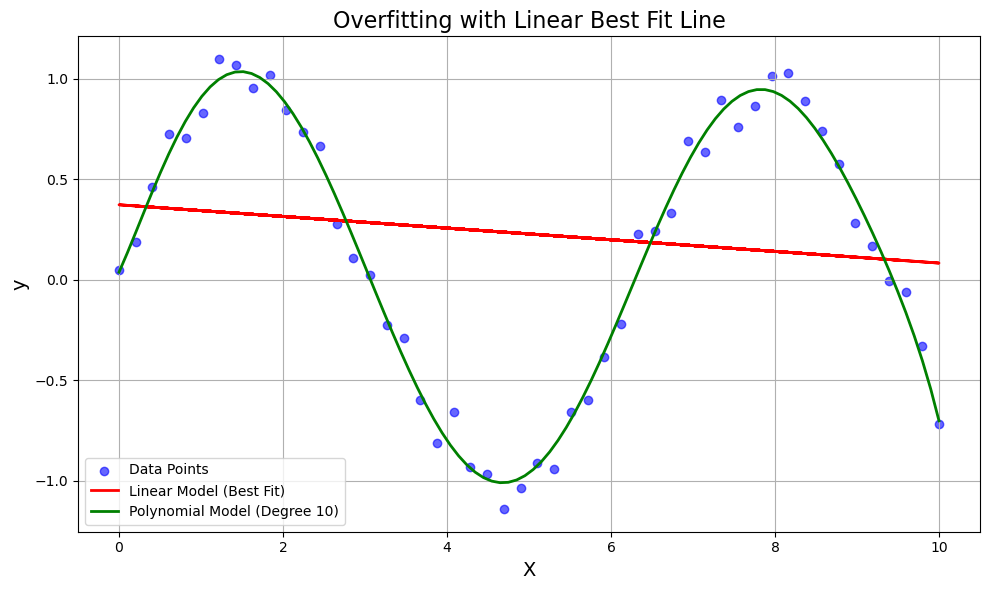

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some example data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = np.sin(X).flatten() + np.random.normal(0, 0.1, 50)  # Sinusoidal data with noise

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear model (best fit line)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_pred_linear = linear_model.predict(X_train)

# Fit a high-degree polynomial model (overfitting)
poly_features = PolynomialFeatures(degree=10)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_pred_poly = poly_model.predict(X_train_poly)

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot of data points
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)

# Plot linear best fit line
plt.plot(X_train, y_train_pred_linear, color='red', label='Linear Model (Best Fit)', linewidth=2)

# Plot polynomial model (overfitting)
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_range_pred_poly = poly_model.predict(X_range_poly)
plt.plot(X_range, y_range_pred_poly, color='green', label='Polynomial Model (Degree 10)', linewidth=2)

# Titles and labels
plt.title("Overfitting with Linear Best Fit Line", fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


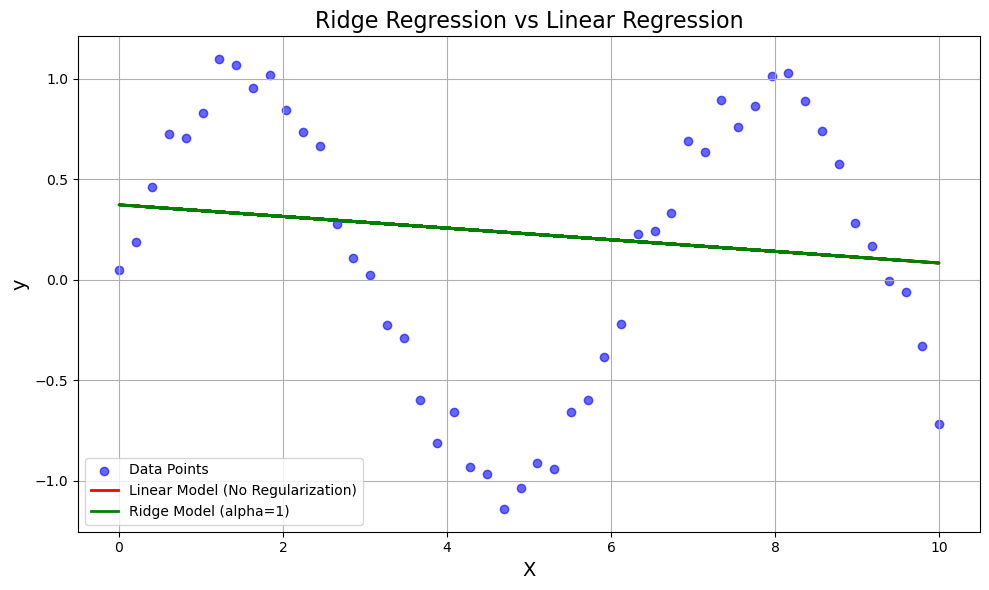

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split

# Generate some example data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = np.sin(X).flatten() + np.random.normal(0, 0.1, 50)  # Sinusoidal data with noise

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_pred_linear = linear_model.predict(X_train)

# Fit a Ridge regression model with different regularization strength
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_model.fit(X_train, y_train)
y_train_pred_ridge = ridge_model.predict(X_train)

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot of data points
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)

# Plot linear regression line
plt.plot(X_train, y_train_pred_linear, color='red', label='Linear Model (No Regularization)', linewidth=2)

# Plot Ridge regression line
plt.plot(X_train, y_train_pred_ridge, color='green', label='Ridge Model (alpha=1)', linewidth=2)

# Titles and labels
plt.title("Ridge Regression vs Linear Regression", fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


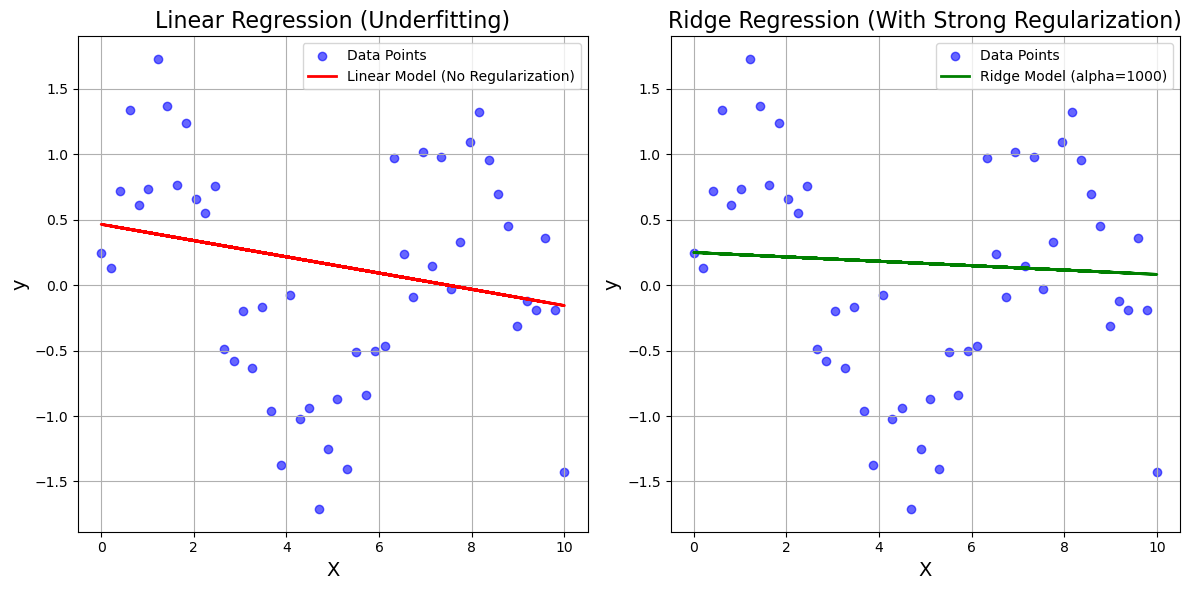

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split

# Generate some example data with more noise
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = np.sin(X).flatten() + np.random.normal(0, 0.5, 50)  # Adding more noise to the data

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_pred_linear = linear_model.predict(X_train)

# Fit a Ridge regression model with stronger regularization
ridge_model = Ridge(alpha=1000.0)  # Increase alpha to make regularization effect more pronounced
ridge_model.fit(X_train, y_train)
y_train_pred_ridge = ridge_model.predict(X_train)

# Plotting the results
plt.figure(figsize=(12, 6))

# Subplot 1: Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_train, y_train_pred_linear, color='red', label='Linear Model (No Regularization)', linewidth=2)
plt.title("Linear Regression (Underfitting)", fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid(True)

# Subplot 2: Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_train, y_train_pred_ridge, color='green', label='Ridge Model (alpha=1000)', linewidth=2)
plt.title("Ridge Regression (With Strong Regularization)", fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


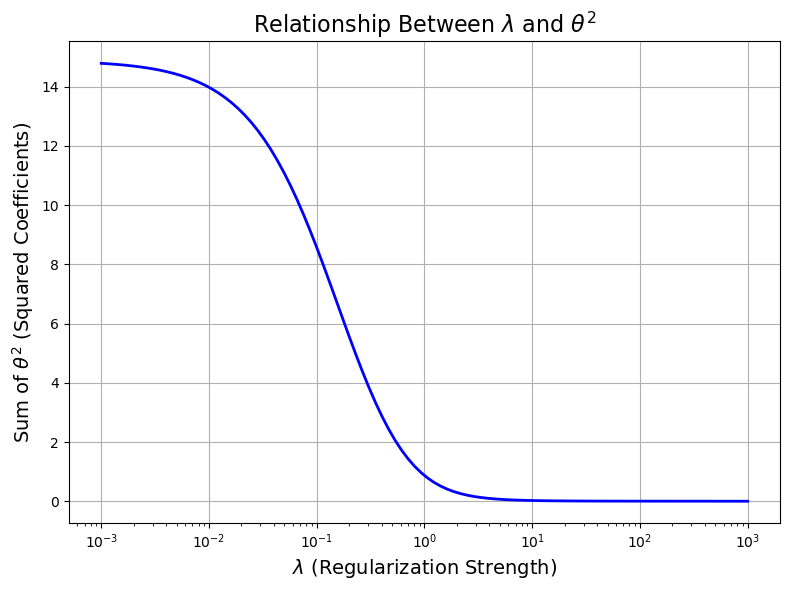

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate some example data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = np.sin(X).flatten() + np.random.normal(0, 0.5, 50)

# Ridge regression with polynomial features
alphas = np.logspace(-3, 3, 100)  # Values of lambda (alpha) from 0.001 to 1000
theta_squares = []

for alpha in alphas:
    # Create a Ridge regression model with polynomial features (degree 5 for more flexibility)
    ridge_model = make_pipeline(PolynomialFeatures(degree=5), Ridge(alpha=alpha))
    ridge_model.fit(X, y)
    
    # Get the coefficients (theta values) from the Ridge model
    coefficients = ridge_model.named_steps['ridge'].coef_
    
    # Compute the sum of squared coefficients (excluding the intercept)
    theta_square_sum = np.sum(coefficients[1:] ** 2)
    theta_squares.append(theta_square_sum)

# Plot the relationship between lambda (alpha) and theta^2
plt.figure(figsize=(8, 6))
plt.plot(alphas, theta_squares, color='blue', linewidth=2)
plt.xscale('log')  # Logarithmic scale for lambda
plt.title(r"Relationship Between $\lambda$ and $\theta^2$", fontsize=16)
plt.xlabel(r"$\lambda$ (Regularization Strength)", fontsize=14)
plt.ylabel(r"Sum of $\theta^2$ (Squared Coefficients)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


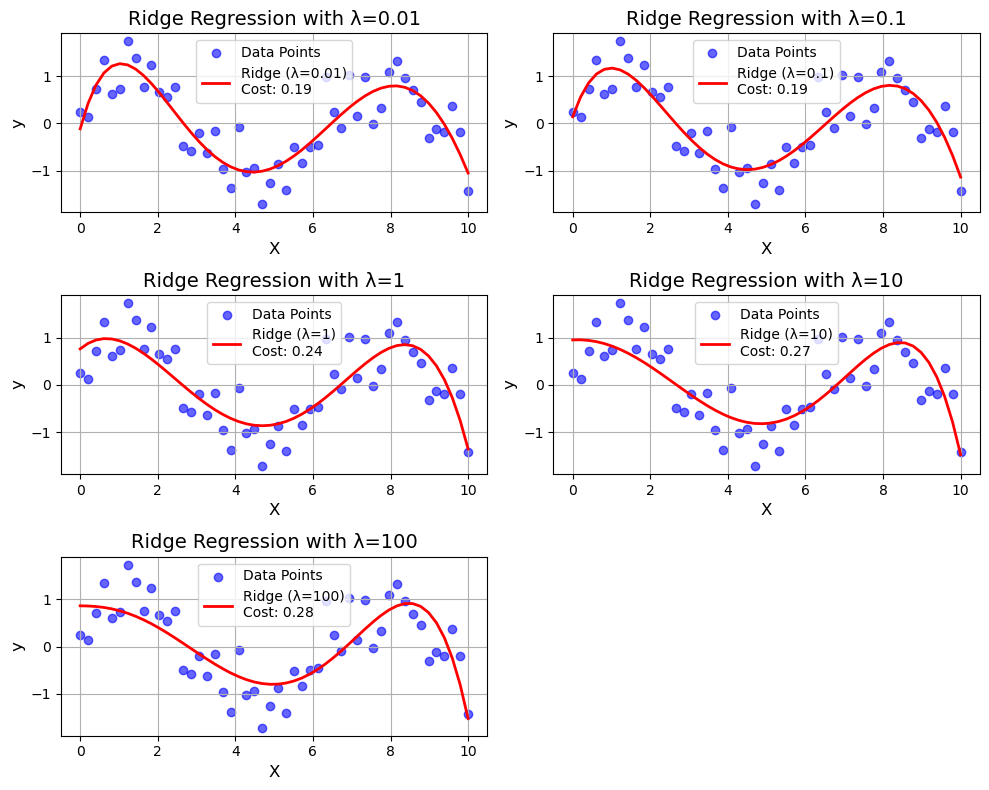

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate some example data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = np.sin(X).flatten() + np.random.normal(0, 0.5, 50)

# Values of lambda (alpha) for Ridge regression
alphas = [0.01, 0.1, 1, 10, 100]

# Create subplots for each lambda value
plt.figure(figsize=(10, 8))

for i, alpha in enumerate(alphas, 1):
    # Create a Ridge regression model with polynomial features (degree 5)
    ridge_model = make_pipeline(PolynomialFeatures(degree=5), Ridge(alpha=alpha))
    ridge_model.fit(X, y)
    
    # Predict on the training data
    y_pred = ridge_model.predict(X)
    
    # Calculate the MSE cost function
    mse = mean_squared_error(y, y_pred)
    
    # Plot the results
    plt.subplot(3, 2, i)
    plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
    plt.plot(X, y_pred, color='red', label=f'Ridge (λ={alpha})\nCost: {mse:.2f}', linewidth=2)
    plt.title(f"Ridge Regression with λ={alpha}", fontsize=14)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.legend()
    plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


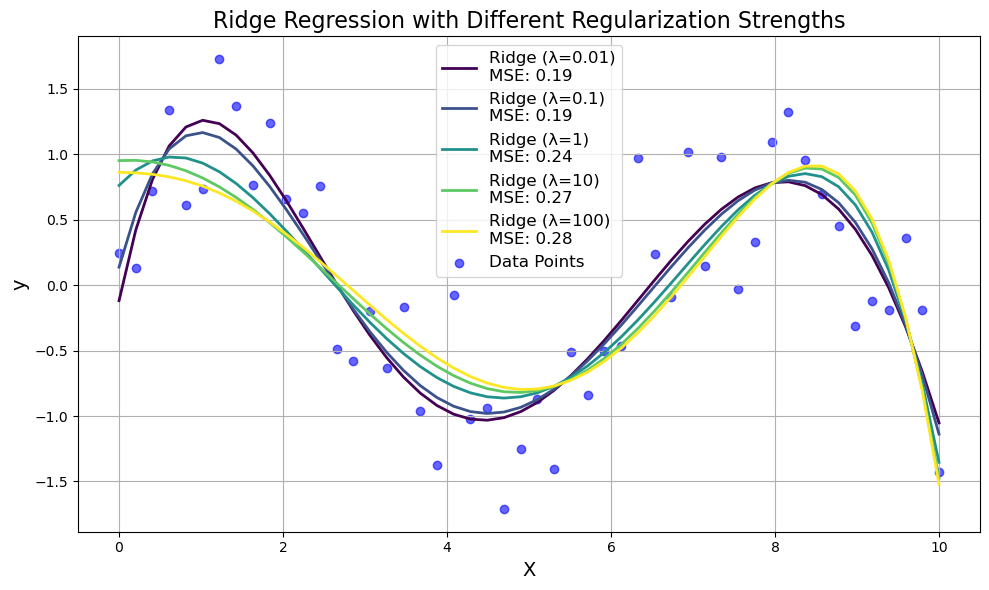

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate some example data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = np.sin(X).flatten() + np.random.normal(0, 0.5, 50)

# Values of lambda (alpha) for Ridge regression
alphas = [0.01, 0.1, 1, 10, 100]
colors = plt.cm.viridis(np.linspace(0, 1, len(alphas)))  # Use a color map for different shades

plt.figure(figsize=(10, 6))

# Loop over different alpha values to plot their corresponding fits
for alpha, color in zip(alphas, colors):
    # Create a Ridge regression model with polynomial features (degree 5)
    ridge_model = make_pipeline(PolynomialFeatures(degree=5), Ridge(alpha=alpha))
    ridge_model.fit(X, y)
    
    # Predict on the training data
    y_pred = ridge_model.predict(X)
    
    # Calculate the MSE cost function
    mse = mean_squared_error(y, y_pred)
    
    # Plot the fit with different shades
    plt.plot(X, y_pred, color=color, label=f'Ridge (λ={alpha})\nMSE: {mse:.2f}', linewidth=2)

# Scatter the original data points
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')

# Labels and legend
plt.title("Ridge Regression with Different Regularization Strengths", fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


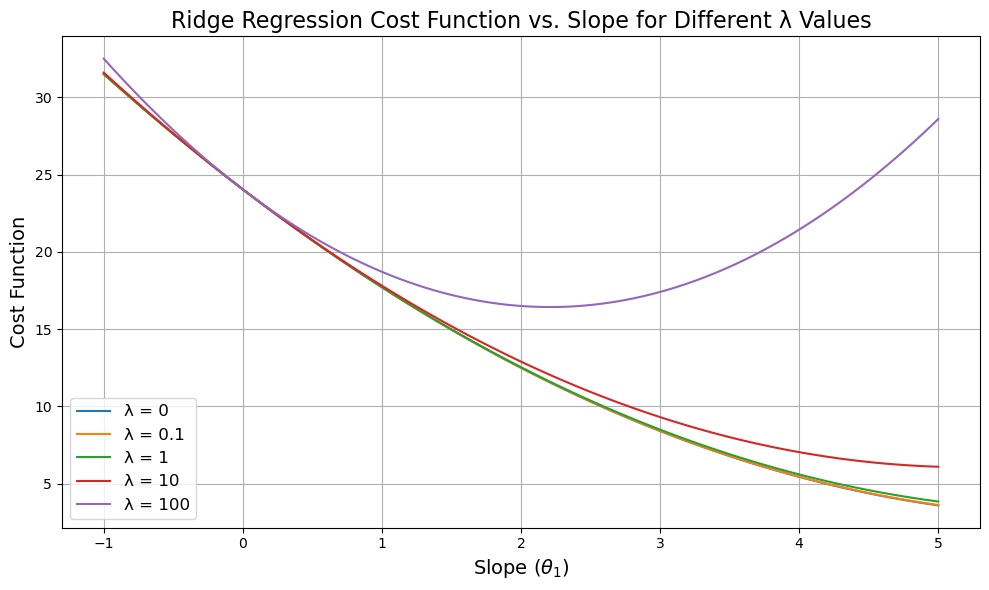

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some simple linear data
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X + np.random.randn(50, 1)

# Values of lambda (alpha) for Ridge regularization
lambdas = [0, 0.1, 1, 10, 100]

# Range of slopes (theta_1) to plot the cost function
theta_1_vals = np.linspace(-1, 5, 100)

# Ridge cost function: (1/2m) * sum((y - X*theta)^2) + (lambda/2m) * sum(theta^2)
def ridge_cost_function(theta_1, X, y, lambda_val):
    m = len(y)
    y_pred = X * theta_1  # prediction for a single feature (ignoring intercept for simplicity)
    mse = (1 / (2 * m)) * np.sum((y - y_pred) ** 2)  # MSE part
    regularization = (lambda_val / (2 * m)) * theta_1 ** 2  # regularization part
    return mse + regularization

# Plot cost function for different lambdas
plt.figure(figsize=(10, 6))

# Loop over different lambda values
for lambda_val in lambdas:
    costs = [ridge_cost_function(theta_1, X, y, lambda_val) for theta_1 in theta_1_vals]
    plt.plot(theta_1_vals, costs, label=f'λ = {lambda_val}')

# Labels and title
plt.title('Ridge Regression Cost Function vs. Slope for Different λ Values', fontsize=16)
plt.xlabel(r'Slope ($\theta_1$)', fontsize=14)
plt.ylabel('Cost Function', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


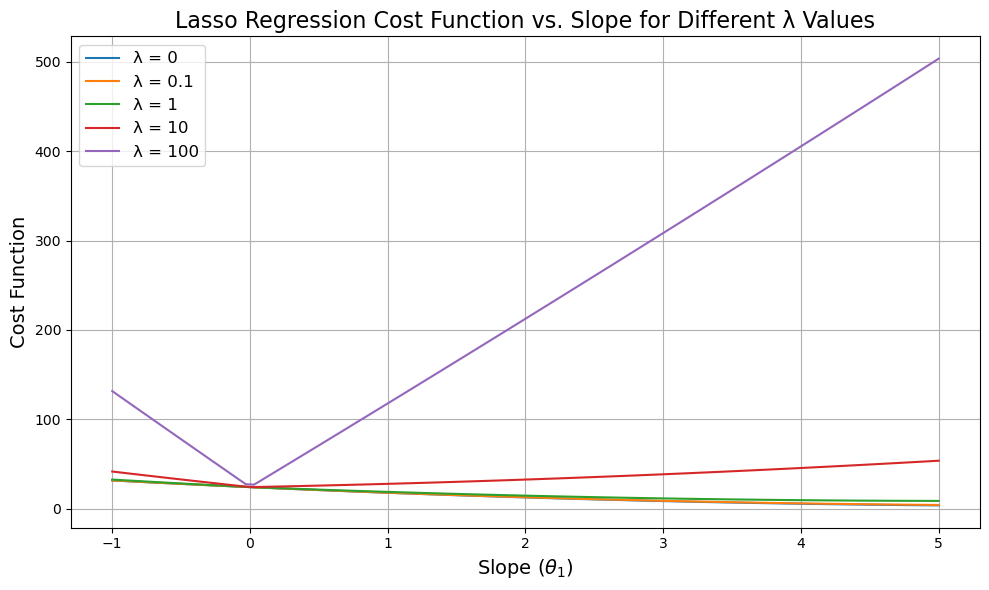

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some simple linear data
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X + np.random.randn(50, 1)

# Values of lambda (alpha) for Lasso regularization
lambdas = [0, 0.1, 1, 10, 100]

# Range of slopes (theta_1) to plot the cost function
theta_1_vals = np.linspace(-1, 5, 100)

# Lasso cost function: (1/2m) * sum((y - X*theta)^2) + lambda * abs(theta)
def lasso_cost_function(theta_1, X, y, lambda_val):
    m = len(y)
    y_pred = X * theta_1  # prediction for a single feature (ignoring intercept for simplicity)
    mse = (1 / (2 * m)) * np.sum((y - y_pred) ** 2)  # MSE part
    regularization = lambda_val * np.abs(theta_1)  # L1 regularization part
    return mse + regularization

# Plot cost function for different lambdas
plt.figure(figsize=(10, 6))

# Loop over different lambda values
for lambda_val in lambdas:
    costs = [lasso_cost_function(theta_1, X, y, lambda_val) for theta_1 in theta_1_vals]
    plt.plot(theta_1_vals, costs, label=f'λ = {lambda_val}')

# Labels and title
plt.title('Lasso Regression Cost Function vs. Slope for Different λ Values', fontsize=16)
plt.xlabel(r'Slope ($\theta_1$)', fontsize=14)
plt.ylabel('Cost Function', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


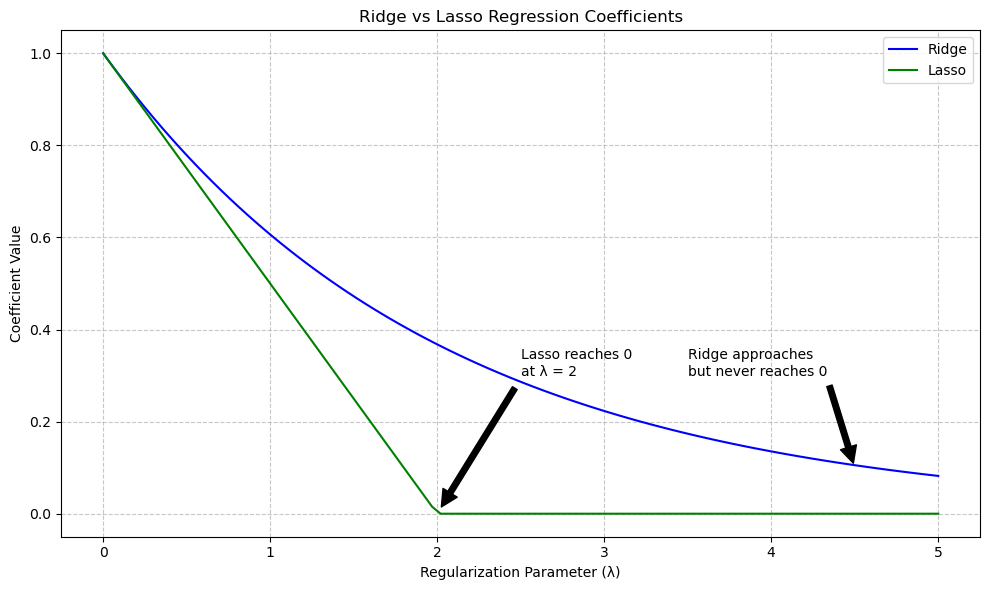

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_coef(lambda_val):
    return np.exp(-lambda_val / 2)

def lasso_coef(lambda_val):
    return np.maximum(0, 1 - lambda_val / 2)

# Generate lambda values
lambda_values = np.linspace(0, 5, 100)

# Calculate coefficient values
ridge_coefs = ridge_coef(lambda_values)
lasso_coefs = lasso_coef(lambda_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, ridge_coefs, label='Ridge', color='blue')
plt.plot(lambda_values, lasso_coefs, label='Lasso', color='green')

plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Coefficient Value')
plt.title('Ridge vs Lasso Regression Coefficients')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations
plt.annotate('Ridge approaches\nbut never reaches 0', xy=(4.5, 0.1), xytext=(3.5, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Lasso reaches 0\nat λ = 2', xy=(2, 0), xytext=(2.5, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

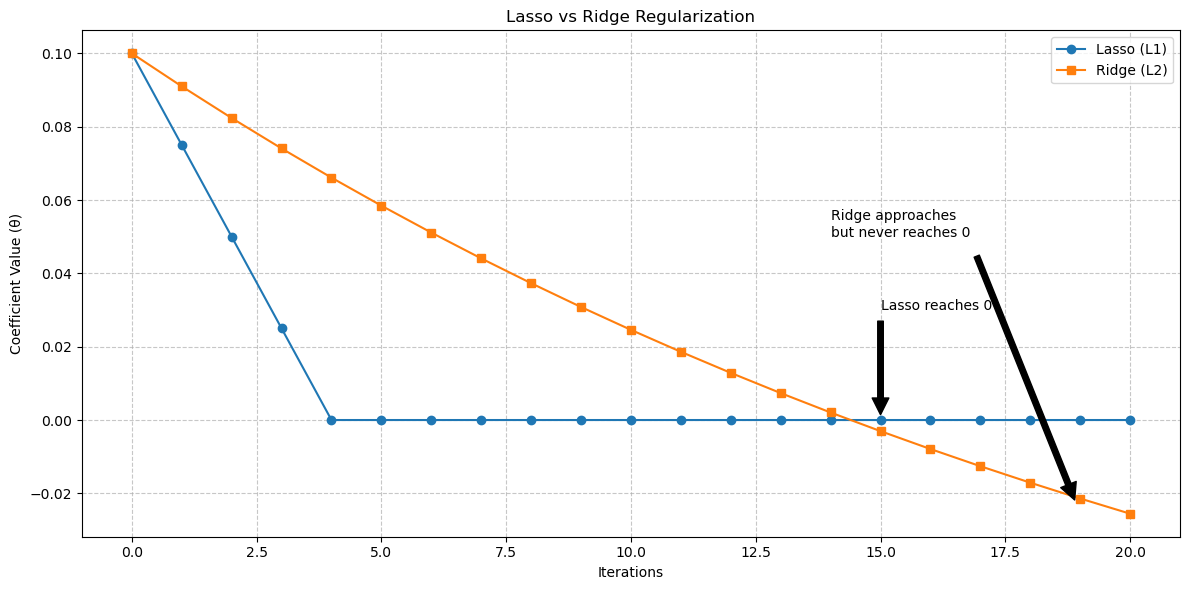

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lasso_update(theta, alpha, lambda_, gradient_mse):
    return theta - alpha * (gradient_mse + lambda_ * np.sign(theta))

def ridge_update(theta, alpha, lambda_, gradient_mse):
    return theta - alpha * (gradient_mse + 2 * lambda_ * theta)

# Parameters
initial_theta = 0.1
alpha = 0.1
lambda_ = 0.2
gradient_mse = 0.05
iterations = 20

# Initialize arrays to store theta values
thetas_lasso = [initial_theta]
thetas_ridge = [initial_theta]

# Perform iterations
for _ in range(iterations):
    thetas_lasso.append(lasso_update(thetas_lasso[-1], alpha, lambda_, gradient_mse))
    thetas_ridge.append(ridge_update(thetas_ridge[-1], alpha, lambda_, gradient_mse))

    # Ensure Lasso doesn't go below zero
    if thetas_lasso[-1] < 0:
        thetas_lasso[-1] = 0

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(range(iterations + 1), thetas_lasso, label='Lasso (L1)', marker='o')
plt.plot(range(iterations + 1), thetas_ridge, label='Ridge (L2)', marker='s')

plt.xlabel('Iterations')
plt.ylabel('Coefficient Value (θ)')
plt.title('Lasso vs Ridge Regularization')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations
plt.annotate('Lasso reaches 0', xy=(15, 0), xytext=(15, 0.03),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Ridge approaches\nbut never reaches 0', xy=(19, thetas_ridge[-1]), 
             xytext=(14, 0.05), arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()